In [1]:
import datetime

from tqdm import keras

print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-06-18 10:49:24.158775


In [50]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)


Num GPUs Available:  1
2.10.0


In [3]:
x = [12, 534, 32, 13, -123, 23, -11, 99]

In [4]:
tf_dataset = tf.data.Dataset.from_tensor_slices(x)

In [5]:
for value in tf_dataset:
    print(value)  # print tensors type

tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(534, shape=(), dtype=int32)
tf.Tensor(32, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(-123, shape=(), dtype=int32)
tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(-11, shape=(), dtype=int32)
tf.Tensor(99, shape=(), dtype=int32)


In [6]:
for value in tf_dataset.as_numpy_iterator():
    print(value)  # print numpy values

12
534
32
13
-123
23
-11
99


In [7]:
for value in tf_dataset.take(3):
    print(value.numpy())

12
534
32


In [8]:
tf_dataset = tf_dataset.shuffle(buffer_size=2)  # shuffle
for value in tf_dataset:
    print(value.numpy())

534
32
12
-123
13
23
99
-11


In [9]:
for value in tf_dataset.batch(3):
    print(value.numpy())

[534  32  13]
[  12 -123  -11]
[99 23]


In [10]:
filtered_tf_dataset = tf_dataset.filter(lambda x: x > 0)  # filter negative values
for value in filtered_tf_dataset:
    print(value.numpy())

12
32
13
534
23
99


In [11]:
new_tf_dataset = filtered_tf_dataset.map(lambda x: x * 205)  # map through every value and apply the func
for value in new_tf_dataset.as_numpy_iterator():
    print(value)

2460
109470
2665
6560
4715
20295


**Apply all transformations in one line**

In [12]:
tf_dataset = tf_dataset.filter(lambda x: x > 0).map(lambda x: x * 205).shuffle(2).batch(3)

In [13]:
for value in tf_dataset:
    print(value.numpy())

[109470   2460   6560]
[20295  4715  2665]


In [14]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"{dirpath} contains {len(dirnames)} files and {len(filenames)} images \n")

In [15]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Manual importing dataset


In [16]:
train_dir = '../pizza_steak/train/*/*'
test_dir = '../pizza_steak/test/*/*'


In [17]:
train_ds = tf.data.Dataset.list_files(train_dir, shuffle=True)
test_ds = tf.data.Dataset.list_files(test_dir, shuffle=True)


In [18]:
for value in train_ds.as_numpy_iterator():
    print(value)

b'..\\pizza_steak\\train\\pizza\\2231356.jpg'
b'..\\pizza_steak\\train\\pizza\\332231.jpg'
b'..\\pizza_steak\\train\\pizza\\216720.jpg'
b'..\\pizza_steak\\train\\pizza\\1209973.jpg'
b'..\\pizza_steak\\train\\pizza\\2412237.jpg'
b'..\\pizza_steak\\train\\pizza\\2602611.jpg'
b'..\\pizza_steak\\train\\pizza\\271779.jpg'
b'..\\pizza_steak\\train\\steak\\510757.jpg'
b'..\\pizza_steak\\train\\steak\\320658.jpg'
b'..\\pizza_steak\\train\\pizza\\2702825.jpg'
b'..\\pizza_steak\\train\\pizza\\1075568.jpg'
b'..\\pizza_steak\\train\\steak\\2404695.jpg'
b'..\\pizza_steak\\train\\steak\\543691.jpg'
b'..\\pizza_steak\\train\\steak\\1829088.jpg'
b'..\\pizza_steak\\train\\steak\\2455944.jpg'
b'..\\pizza_steak\\train\\steak\\2815172.jpg'
b'..\\pizza_steak\\train\\pizza\\3193599.jpg'
b'..\\pizza_steak\\train\\steak\\2446660.jpg'
b'..\\pizza_steak\\train\\pizza\\3862243.jpg'
b'..\\pizza_steak\\train\\pizza\\2999507.jpg'
b'..\\pizza_steak\\train\\steak\\262321.jpg'
b'..\\pizza_steak\\train\\steak\\1433912.

In [19]:
for file in train_ds.take(3):
    print(file.numpy())

b'..\\pizza_steak\\train\\steak\\2125877.jpg'
b'..\\pizza_steak\\train\\steak\\2825100.jpg'
b'..\\pizza_steak\\train\\pizza\\2723529.jpg'


In [20]:
class_names = ['Pizza', 'Steak']
class_names = np.array(class_names)

In [21]:
np.where(class_names == 'Steak')

(array([1], dtype=int64),)

In [22]:
train_count = len(train_ds)
test_count = len(test_ds)
print('training images : ', train_count)
print('testing images : ', test_count)

training images :  1500
testing images :  500


In [23]:
s = 'pizza_steak\\train\\pizza\\1008844.jpg'
s.split('\\')[-2]

'pizza'

In [24]:
def get_label(file_path):
    return tf.strings.split(file_path, os.path.sep)[-2]


In [25]:
IMG_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 5


In [26]:
def process_image(file_path):
    label = get_label(file_path)
    if label == 'pizza':
        integer_label = 0
    else:
        integer_label = 1
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image,channels=CHANNELS)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    

    return image, integer_label

In [27]:
for value in train_ds.as_numpy_iterator():
    print(value)

b'..\\pizza_steak\\train\\steak\\1295457.jpg'
b'..\\pizza_steak\\train\\pizza\\1035854.jpg'
b'..\\pizza_steak\\train\\pizza\\282013.jpg'
b'..\\pizza_steak\\train\\pizza\\3281494.jpg'
b'..\\pizza_steak\\train\\steak\\3855584.jpg'
b'..\\pizza_steak\\train\\pizza\\2769168.jpg'
b'..\\pizza_steak\\train\\pizza\\2428085.jpg'
b'..\\pizza_steak\\train\\steak\\3492328.jpg'
b'..\\pizza_steak\\train\\steak\\3766099.jpg'
b'..\\pizza_steak\\train\\steak\\2823872.jpg'
b'..\\pizza_steak\\train\\steak\\2011264.jpg'
b'..\\pizza_steak\\train\\pizza\\1553353.jpg'
b'..\\pizza_steak\\train\\pizza\\1029698.jpg'
b'..\\pizza_steak\\train\\pizza\\3910117.jpg'
b'..\\pizza_steak\\train\\pizza\\233143.jpg'
b'..\\pizza_steak\\train\\steak\\285147.jpg'
b'..\\pizza_steak\\train\\steak\\2940544.jpg'
b'..\\pizza_steak\\train\\steak\\3030578.jpg'
b'..\\pizza_steak\\train\\pizza\\1895479.jpg'
b'..\\pizza_steak\\train\\pizza\\2471646.jpg'
b'..\\pizza_steak\\train\\pizza\\242813.jpg'
b'..\\pizza_steak\\train\\steak\\24043

In [28]:
def scale(image, label):
    return image / 255, label

In [29]:
final_train_ds =  train_ds.map(process_image).map(scale).batch(batch_size=32).cache().prefetch(tf.data.AUTOTUNE)
final_test_ds = test_ds.map(process_image).map(scale).batch(batch_size=32).cache().prefetch(tf.data.AUTOTUNE)

In [30]:
final_train_ds, final_test_ds

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [31]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.binary_crossentropy,
               metrics=['accuracy'])

In [32]:
len(final_train_ds)// EPOCHS

9

In [33]:
# with tf.device('/GPU:0'):  # Use the first GPU

history1 = model1.fit(final_train_ds,
                      epochs=EPOCHS,
                      steps_per_epoch=len(final_train_ds),
                      validation_data=final_test_ds,
                      validation_steps=len(final_test_ds)
                                             
                      )
keys_to_delete = ['loss', 'val_loss']
for key in keys_to_delete:
    if key in history1.history:
        del history1.history[key]

Epoch 1/5
47/47 [==============================] - 14s 123ms/step - loss: 0.5422 - accuracy: 0.7207 - val_loss: 0.3854 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 3s 56ms/step - loss: 0.4340 - accuracy: 0.8100 - val_loss: 0.3173 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 3s 56ms/step - loss: 0.4016 - accuracy: 0.8280 - val_loss: 0.3144 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 3s 56ms/step - loss: 0.3672 - accuracy: 0.8380 - val_loss: 0.2974 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 3s 55ms/step - loss: 0.3494 - accuracy: 0.8513 - val_loss: 0.2856 - val_accuracy: 0.8920


<Axes: >

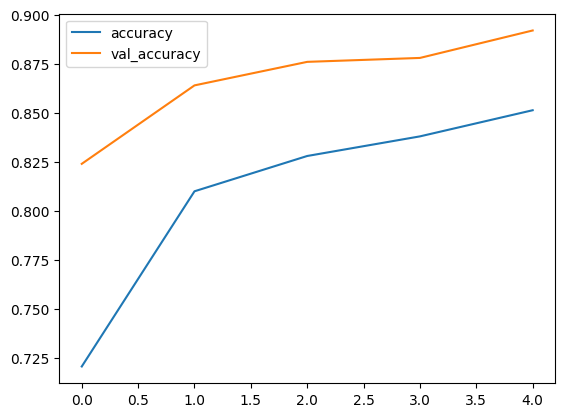

In [34]:
pd.DataFrame(history1.history).plot()

# Keras function to import dataset

In [36]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='../pizza_steak/train',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE)
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='../pizza_steak/test',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE)
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [37]:
for images, labels in train_dataset.take(1):
    print(labels)

tf.Tensor([0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1], shape=(32,), dtype=int32)


In [38]:
train_dataset.class_names

['pizza', 'steak']

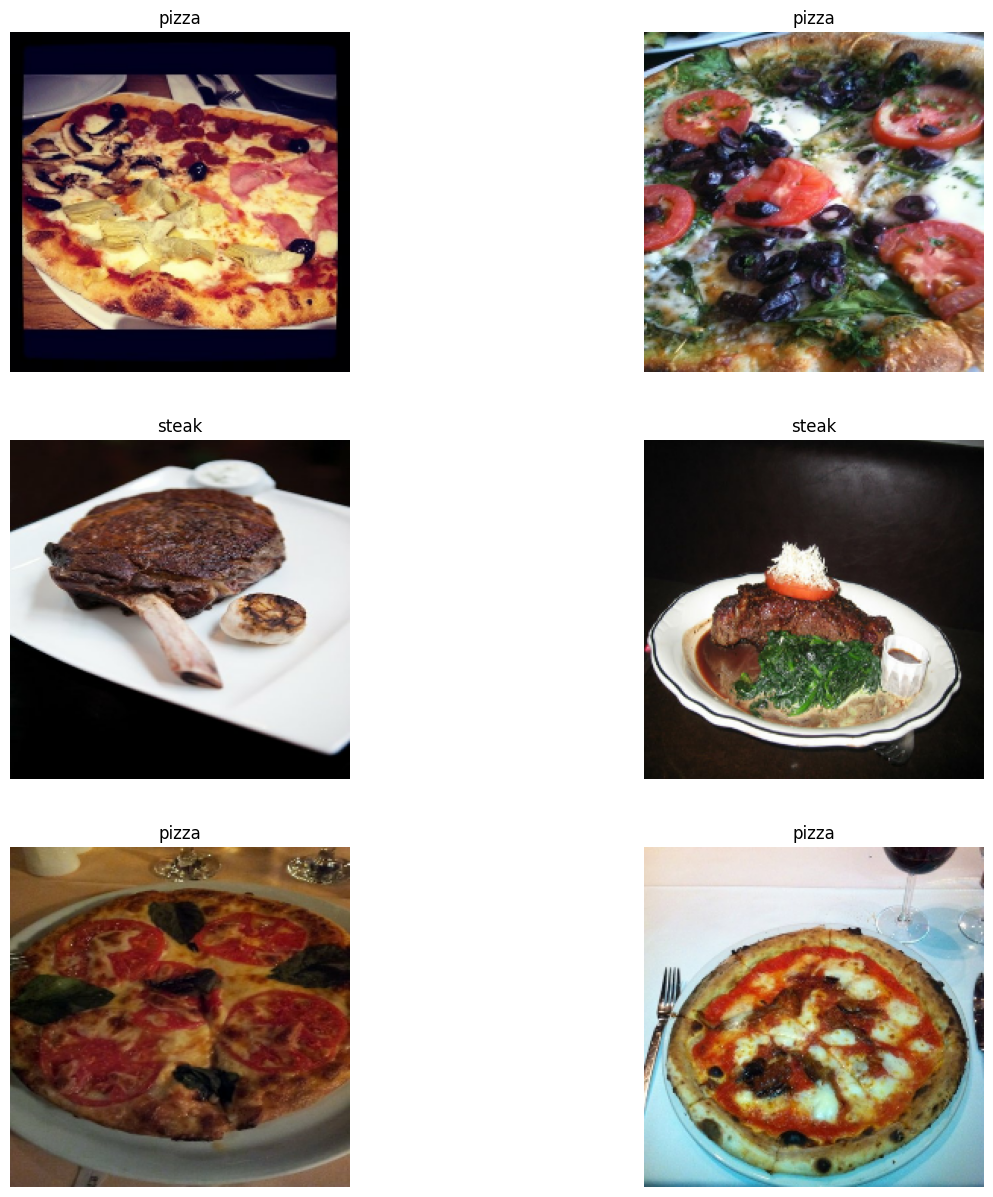

In [39]:
for batch_images, batch_labels in train_dataset.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(6):
        plt.subplot(3, 2, i + 1)
        plt.imshow(batch_images[i].numpy().astype('uint8'))
        plt.title(train_dataset.class_names[batch_labels[i]])
        plt.axis('off')

In [40]:
train_data = train_dataset

holdout_len = int(len(test_dataset))

# divide test dataset to test and val subsets
test_data = test_dataset.take(int(holdout_len * 0.5))
val_data = test_dataset.skip(int(holdout_len * 0.5))

In [41]:
len(train_data), len(test_data), len(val_data)

(47, 8, 8)

In [42]:
train_data = train_data.cache().shuffle(100).prefetch(tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(100).prefetch(tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(100).prefetch(tf.data.AUTOTUNE)

In [43]:
from keras import layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE,IMG_SIZE),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2)
    
])

In [44]:
model2 = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    
])
for layer in model1.layers:  # Skip the first layer (input layer)
    model2.add(layer)

In [45]:
model1.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.binary_crossentropy,
               metrics=['accuracy'])

In [46]:
for value, label in train_data.as_numpy_iterator():
    print(label)

[1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0]
[0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0]
[0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1]
[0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0]
[0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1]
[1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1]
[0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0]
[1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0]
[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0]
[0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0]
[0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0]
[0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1]
[0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1]
[0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1]
[0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0]
[1 1 0 1 1

In [47]:
with tf.device('/GPU:0'):  # Use the first GPU

    history = model1.fit(train_data,
                          epochs=3,
                          steps_per_epoch=len(train_data),
                          validation_data=val_data,
                          validation_steps=len(val_data)
                         )
    
keys_to_delete = ['loss', 'val_loss']
for key in keys_to_delete:
    if key in history.history:
        del history.history[key]

Epoch 1/3
47/47 [==============================] - 4s 63ms/step - loss: 7.0774 - accuracy: 0.8467 - val_loss: 1.1853 - val_accuracy: 0.8648
Epoch 2/3
47/47 [==============================] - 3s 54ms/step - loss: 0.5546 - accuracy: 0.9060 - val_loss: 0.9739 - val_accuracy: 0.8648
Epoch 3/3
47/47 [==============================] - 3s 54ms/step - loss: 0.2466 - accuracy: 0.9393 - val_loss: 0.6502 - val_accuracy: 0.8648


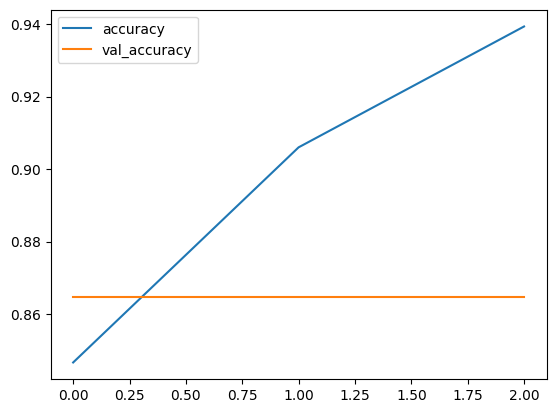

In [48]:
pd.DataFrame(history.history).plot();

In [49]:
model1.evaluate(val_data, verbose=1)

8/8 [==============================] - 0s 17ms/step - loss: 0.6502 - accuracy: 0.8648


[0.6501691341400146, 0.8647540807723999]